Test the proportionality assumption for gender and enter the resulting p value from the output, rounding to two decimal places if necessary. Different versions of the package give slightly different answers, so we will accept both.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

from lifelines import CoxPHFitter
from lifelines.statistics import proportional_hazard_test

In [2]:
df = pd.read_csv("final.csv")

In [3]:
df

,id,death,los,age,gender,cancer,cabg,crt,defib,dementia,...,pacemaker,pneumonia,prior_appts_attended,prior_dnas,pci,stroke,senile,quintile,ethnicgroup,fu_time
0,1,0,2,90,2,0,0,0,0,0,...,0,0,4,0,0,0,0,2.0,NaN,416
1,2,0,10,74,1,0,0,0,0,0,...,0,1,9,1,0,0,0,4.0,1.0,648
2,3,0,3,83,2,0,0,0,0,0,...,0,0,1,0,0,0,0,3.0,1.0,466
3,4,0,1,79,1,0,0,0,0,0,...,1,0,9,2,1,1,0,5.0,1.0,441
4,5,0,17,94,2,0,0,0,0,0,...,0,0,3,0,0,0,0,2.0,1.0,371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0,8,73,1,0,0,0,0,0,...,0,0,0,0,0,0,0,5.0,1.0,351
996,997,1,5,84,2,0,0,0,0,0,...,0,0,9,0,0,0,0,3.0,1.0,1030
997,998,0,3,87,1,0,0,0,0,0,...,0,0,3,0,0,0,0,4.0,1.0,15
998,999,1,62,86,2,0,0,0,0,0,...,0,1,1,0,0,0,0,2.0,1.0,339


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1000 non-null   int64  
 1   death                 1000 non-null   int64  
 2   los                   1000 non-null   int64  
 3   age                   1000 non-null   int64  
 4   gender                1000 non-null   int64  
 5   cancer                1000 non-null   int64  
 6   cabg                  1000 non-null   int64  
 7   crt                   1000 non-null   int64  
 8   defib                 1000 non-null   int64  
 9   dementia              1000 non-null   int64  
 10  diabetes              1000 non-null   int64  
 11  hypertension          1000 non-null   int64  
 12  ihd                   1000 non-null   int64  
 13  mental_health         1000 non-null   int64  
 14  arrhythmias           1000 non-null   int64  
 15  copd                  

In [5]:
df.columns

Index(['id', 'death', 'los', 'age', 'gender', 'cancer', 'cabg', 'crt', 'defib',
       'dementia', 'diabetes', 'hypertension', 'ihd', 'mental_health',
       'arrhythmias', 'copd', 'obesity', 'pvd', 'renal_disease',
       'valvular_disease', 'metastatic_cancer', 'pacemaker', 'pneumonia',
       'prior_appts_attended', 'prior_dnas', 'pci', 'stroke', 'senile',
       'quintile', 'ethnicgroup', 'fu_time'],
      dtype='object')

In [6]:
df2 = df[['death', 'los', 'age', 'gender', 'copd', 'obesity', 'fu_time']]

In [7]:
df2

,death,los,age,gender,copd,obesity,fu_time
0,0,2,90,2,0,0,416
1,0,10,74,1,0,0,648
2,0,3,83,2,0,0,466
3,0,1,79,1,1,0,441
4,0,17,94,2,0,0,371
...,...,...,...,...,...,...,...
995,0,8,73,1,1,0,351
996,1,5,84,2,1,0,1030
997,0,3,87,1,0,0,15
998,1,62,86,2,1,0,339


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   death    1000 non-null   int64
 1   los      1000 non-null   int64
 2   age      1000 non-null   int64
 3   gender   1000 non-null   int64
 4   copd     1000 non-null   int64
 5   obesity  1000 non-null   int64
 6   fu_time  1000 non-null   int64
dtypes: int64(7)
memory usage: 54.8 KB


In [9]:
cph = CoxPHFitter()

In [10]:
cph.fit(df2, duration_col='fu_time', event_col='death')

<lifelines.CoxPHFitter: fitted with 1000 total observations, 508 right-censored observations>

In [11]:
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 1000 total observations, 508 right-censored observations>
             duration col = 'fu_time'
                event col = 'death'
      baseline estimation = breslow
   number of observations = 1000
number of events observed = 492
   partial log-likelihood = -2874.45
         time fit was run = 2021-05-08 08:10:50 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
los         0.01       1.01       0.00             0.01             0.02                 1.01                 1.02
age         0.06       1.06       0.01             0.05             0.07                 1.05                 1.07
gender     -0.28       0.75       0.09            -0.47            -0.10                 0.63                 0.90
copd        0.13       1.14       0.10            -0.08             0.33                 0.93                 1.39
obesity     0.03       1.03       0.22            -0.40             0.45                 0.67                 1.57

              z      p   -log2(p)
covariate                        
los        4.38 <0.005      16.36
age       10.76 <0.005      87.34
gender    -3.02 <0.005       8.63
copd       1.23   0.22       2.18
obesity    0.12   0.90       0.15
---
Concordance = 0.67
Partial AIC = 5758.89
log-likelihood ratio test = 164.29 on 5 df
-log2(p) of ll-ratio test = 109.36

In [12]:
# cph.fit(rossi, duration_col='week', event_col='arrest', formula="fin + wexp + age * prio")
# cph.print_summary()

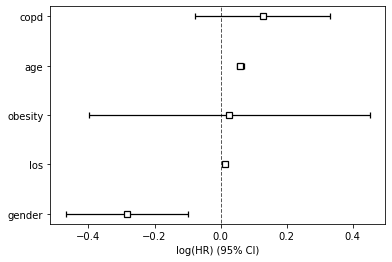

In [13]:
cph.plot()
plt.show()

In [14]:
# cph.plot_partial_effects_on_outcome(covariates='prio', values=[0, 2, 4, 6, 8, 10], cmap='coolwarm', figsize=(20,10))
# plt.show()

In [15]:
cph.check_assumptions(df2, p_value_threshold=0.05, show_plots=True)


Proportional hazard assumption looks okay.


[]

In [16]:
results = proportional_hazard_test(cph, df2, time_transform='rank')
results.print_summary(decimals=4)

<lifelines.StatisticalResult: proportional_hazard_test>
    time_transform = rank
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 1000 total observations, 508 right-censored observations>
         test_name = proportional_hazard_test

---
         test_statistic    p  -log2(p)
age                0.54 0.46      1.12
copd               0.18 0.67      0.57
gender             1.72 0.19      2.40
los                0.12 0.73      0.45
obesity            2.66 0.10      3.29